In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifetimes as life
import seaborn as sb
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [90]:
sales_data = pd.read_csv("shopify_orders_export.csv", low_memory=False )
sales_data['Paid at'] = pd.to_datetime(sales_data['Paid at'])
sales_data['Fulfilled at'] = pd.to_datetime(sales_data['Fulfilled at'])
sales_data['Created at'] = pd.to_datetime(sales_data['Created at'])
sales_data.info()
sales_data_clean = sales_data.drop(sales_data.columns.to_series()[-11:-1], axis=1)
sales_data_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29103 entries, 0 to 29102
Data columns (total 71 columns):
Name                           29103 non-null object
Email                          24834 non-null object
Financial Status               13373 non-null object
Paid at                        12751 non-null datetime64[ns]
Fulfillment Status             13373 non-null object
Fulfilled at                   13272 non-null datetime64[ns]
Accepts Marketing              13373 non-null object
Currency                       13373 non-null object
Subtotal                       13373 non-null float64
Shipping                       13373 non-null float64
Taxes                          13373 non-null float64
Total                          13373 non-null float64
Discount Code                  3131 non-null object
Discount Amount                13373 non-null float64
Shipping Method                6342 non-null object
Created at                     29103 non-null datetime64[ns]
Lineitem quantit

Name                      Email Financial Status  \
0        191569914377      yeejian1988@gmail.com             paid   
1        191569914377      yeejian1988@gmail.com              NaN   
2        191569914377      yeejian1988@gmail.com              NaN   
3        191569914377      yeejian1988@gmail.com              NaN   
4        191569914377      yeejian1988@gmail.com              NaN   
5      191569914-1708                        NaN             paid   
6      191569914-1707    chenyee0315@hotmail.com             paid   
7        191569914374          jay_sbp@yahoo.com             paid   
8        191569914373   teo_pearlyn@yahoo.com.sg             paid   
9        191569914372  phankimchi.pham@gmail.com             paid   
10       191569914372  phankimchi.pham@gmail.com              NaN   
11       191569914371        norib67@hotmail.com             paid   
12       191569914371        norib67@hotmail.com              NaN   
13       191569914371        norib67@hotmail.com              NaN   
14       191569914370          swanzel@gmail.com             paid   
15       191569914369      liying_92@hotmail.com             paid   
16       191569914369      liying_92@hotmail.com              NaN   
17       191569914369      liying_92@hotmail.com              NaN   
18       191569914368    jenny001kim@hotmail.com             paid   
19       191569914367         kohben96@gmail.com             paid   
20       191569914366     py.facial@yahoo.com.sg             paid   
21       191569914365           jinotan@live.com             paid   
22       191569914365           jinotan@live.com              NaN   
23       191569914365           jinotan@live.com              NaN   
24       191569914364       tanpooisze@gmail.com             paid   
25       191569914364       tanpooisze@gmail.com              NaN   
26       191569914364       tanpooisze@gmail.com              NaN   
27       191569914364       tanpooisze@gmail.com              NaN   
28       191569914363      stacylee.sy@gmail.com             paid   
29       191569914363      stacylee.sy@gmail.com              NaN   
...               ...                        ...              ...   
29073   19156794-1005                        NaN         refunded   
29074   19156794-1004                        NaN             paid   
29075     19156791023           wytanj@gmail.com         refunded   
29076   19156794-1003                        NaN             paid   
29077   19156794-1003                        NaN              NaN   
29078   19156794-1002    anradmacher@hotmail.com             paid   
29079   19156794-1002    anradmacher@hotmail.com              NaN   
29080   19156794-1002    anradmacher@hotmail.com              NaN   
29081   19156794-1002    anradmacher@hotmail.com              NaN   
29082   19156794-1002    anradmacher@hotmail.com              NaN   
29083     19135641020        limlixiaa@gmail.com         refunded   
29084     19135641019           wytanj@gmail.com         refunded   
29085   19135644-1001                        NaN         refunded   
29086     19135641017           wytanj@gmail.com         refunded   
29087     19135641017           wytanj@gmail.com              NaN   
29088     19135641016                        NaN         refunded   
29089     19135641015                        NaN         refunded   
29090     19135641014                        NaN         refunded   
29091     19135641013                        NaN         refunded   
29092     19135641012     raied.rahman@gmail.com             paid   
29093     19135641011           wytanj@gmail.com             paid   
29094     19135641010           wytanj@gmail.com         refunded   
29095     19135641009           wytanj@gmail.com         refunded   
29096     19135641008           wytanj@gmail.com         refunded   
29097     19135641007    raied.r@paulaschoice.sg             paid   
29098           test3           wytanj@gmail.com             paid   
29099          

In [91]:
sales_data.head(30)

Name                      Email Financial Status  \
0     191569914377      yeejian1988@gmail.com             paid   
1     191569914377      yeejian1988@gmail.com              NaN   
2     191569914377      yeejian1988@gmail.com              NaN   
3     191569914377      yeejian1988@gmail.com              NaN   
4     191569914377      yeejian1988@gmail.com              NaN   
5   191569914-1708                        NaN             paid   
6   191569914-1707    chenyee0315@hotmail.com             paid   
7     191569914374          jay_sbp@yahoo.com             paid   
8     191569914373   teo_pearlyn@yahoo.com.sg             paid   
9     191569914372  phankimchi.pham@gmail.com             paid   
10    191569914372  phankimchi.pham@gmail.com              NaN   
11    191569914371        norib67@hotmail.com             paid   
12    191569914371        norib67@hotmail.com              NaN   
13    191569914371        norib67@hotmail.com              NaN   
14    191569914370          swanzel@gmail.com             paid   
15    191569914369      liying_92@hotmail.com             paid   
16    191569914369      liying_92@hotmail.com              NaN   
17    191569914369      liying_92@hotmail.com              NaN   
18    191569914368    jenny001kim@hotmail.com             paid   
19    191569914367         kohben96@gmail.com             paid   
20    191569914366     py.facial@yahoo.com.sg             paid   
21    191569914365           jinotan@live.com             paid   
22    191569914365           jinotan@live.com              NaN   
23    191569914365           jinotan@live.com              NaN   
24    191569914364       tanpooisze@gmail.com             paid   
25    191569914364       tanpooisze@gmail.com              NaN   
26    191569914364       tanpooisze@gmail.com              NaN   
27    191569914364       tanpooisze@gmail.com              NaN   
28    191569914363      stacylee.sy@gmail.com             paid   
29    191569914363      stacylee.sy@gmail.com              NaN   

               Paid at Fulfillment Status        Fulfilled at  \
0  2018-01-29 05:32:44          fulfilled 2018-01-29 05:32:45   
1                  NaT                NaN                 NaT   
2                  NaT                NaN                 NaT   
3                  NaT                NaN                 NaT   
4                  NaT                NaN                 NaT   
5  2018-01-29 05:22:30          fulfilled 2018-01-29 05:22:29   
6  2018-01-29 04:56:48          fulfilled 2018-01-29 04:56:48   
7  2018-01-29 04:35:52          fulfilled 2018-01-29 04:35:52   
8  2018-01-29 04:34:12          fulfilled 2018-01-29 04:34:12   
9  2018-01-29 04:28:19          fulfilled 2018-01-29 04:28:19   
10                 NaT                NaN                 NaT   
11 2018-01-29 04:15:46          fulfilled 2018-01-29 04:15:47   
12                 NaT                NaN                 NaT   
13                 NaT                NaN                 NaT   
14 2018-01-29 03:45:45          fulfilled 2018-01-29 03:45:46   
15 2018-01-29 03:24:58        unfulfilled                 NaT   
16                 NaT                NaN                 NaT   
17                 NaT                NaN                 NaT   
18                 NaT        unfulfilled                 NaT   
19 2018-01-29 02:32:16        unfulfilled                 NaT   
20 2018-01-29 00:45:26        unfulfilled                 NaT   
21 2018-01-28 23:34:29        unfulfilled                 NaT   
22                 NaT                NaN                 NaT   
23                 NaT                NaN                 NaT   
24 2018-01-28 23:28:31        unfulfilled                 NaT   
25                 NaT                NaN                 NaT   
26                 NaT                NaN                 NaT   
27                 NaT                NaN                 NaT   
28 2018-01-28 16:17:21        unfulfilled                 NaT   
29               

In [92]:
customer_emails = sales_data_clean[['Email', 'Paid at']].drop_duplicates()
# customer_emails.Email.dropna(inplace=True)
customer_emails.dropna(inplace=True)
customer_emails

Email             Paid at
0          yeejian1988@gmail.com 2018-01-29 05:32:44
6        chenyee0315@hotmail.com 2018-01-29 04:56:48
7              jay_sbp@yahoo.com 2018-01-29 04:35:52
8       teo_pearlyn@yahoo.com.sg 2018-01-29 04:34:12
9      phankimchi.pham@gmail.com 2018-01-29 04:28:19
11           norib67@hotmail.com 2018-01-29 04:15:46
14             swanzel@gmail.com 2018-01-29 03:45:45
15         liying_92@hotmail.com 2018-01-29 03:24:58
19            kohben96@gmail.com 2018-01-29 02:32:16
20        py.facial@yahoo.com.sg 2018-01-29 00:45:26
21              jinotan@live.com 2018-01-28 23:34:29
24          tanpooisze@gmail.com 2018-01-28 23:28:31
28         stacylee.sy@gmail.com 2018-01-28 16:17:21
30          chuajj96@hotmail.com 2018-01-28 14:38:40
32          rrrrrrrose@gmail.com 2018-01-28 14:26:06
34          zhujin0928@gmail.com 2018-01-28 12:45:09
37            mrrat.jw@gmail.com 2018-01-28 12:24:37
39       artemis_lovee@gmail.com 2018-01-28 12:06:55
41      rachel.murray@tts.edu.sg 2018-01-28 11:58:35
43           amycres@hotmail.com 2018-01-28 11:30:04
45           rongerard@gmail.com 2018-01-28 11:18:26
47       richardgravil@gmail.com 2018-01-28 10:53:54
49             sss4253@naver.com 2018-01-28 10:52:32
50        jernice.wong@gmail.com 2018-01-28 10:39:18
53         azuwabolhan@yahoo.com 2018-01-28 10:33:58
54          violet_738@Yahoo.com 2018-01-28 10:33:30
57         schauenberg@kensho.de 2018-01-28 10:08:42
60        roselinefong@ymail.com 2018-01-28 09:55:52
62             tdrissner@gmx.net 2018-01-28 07:47:30
72           loananhle@gmail.com 2018-01-28 07:36:04
...                          ...                 ...
29013        ongmeiling@live.com 2016-12-02 09:44:29
29016          emil730@yahoo.com 2016-12-02 09:23:12
29019     hweeing@singnet.com.sg 2016-12-02 09:21:53
29020       zachery.ng@gmail.com 2016-12-02 09:19:44
29026      thetang34@hotmail.com 2016-12-02 09:03:53
29029       yf.loves@hotmail.com 2016-12-02 08:59:28
29030     trixtrixtrix@gmail.com 2016-12-02 08:40:12
29032          suzziee@gmail.com 2016-12-02 08:26:10
29033  joyesingapore@hotmail.com 2016-12-02 08:25:54
29035      charmaineee@gmail.com 2016-12-02 08:24:35
29036       thanhvan84@gmail.com 2016-12-02 07:12:18
29041           licia805@aim.com 2016-12-02 06:50:28
29042  steventriantodj@gmail.com 2016-12-02 06:41:00
29044      lszjulianne@gmail.com 2016-12-02 06:30:25
29048           payg17@yahoo.com 2016-12-02 04:57:04
29052    ada.wong@rocketmail.com 2016-12-02 04:12:11
29059     yewsoonsiong@gmail.com 2016-12-02 03:48:13
29060     Stuzzy1973@hotmail.com 2016-12-02 02:40:06
29061     ms.sue.adams@gmail.com 2016-12-02 02:34:24
29062        rogini611@gmail.com 2016-12-02 00:09:10
29065      emilymancer@gmail.com 2016-12-01 23:14:15
29068       chinyingqi@gmail.com 2016-12-01 17:50:16
29078    anradmacher@hotmail.com 2016-12-01 04:52:39
29092     raied.rahman@gmail.com 2016-11-29 09:44:08
29093           wytanj@gmail.com 2016-11-16 11:09:32
29097    raied.r@paulaschoice.sg 2016-11-11 13:53:07
29098           wytanj@gmail.com 2016-10-12 10:36:52
29099           wytanj@gmail.com 2016-10-12 06:48:15
29100           wytanj@gmail.com 2016-10-12 06:34:47
29101           wytanj@gmail.com 2016-10-04 10:58:07

[10722 rows x 2 columns]

In [93]:
customer_emails_count = customer_emails.groupby(by='Email')['Paid at'].aggregate('count')
pd.DataFrame(customer_emails_count).sort_index(by='Paid at')

C:\Users\limzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


Paid at
Email                                      
zzlich@gmail.com                          1
leyy-@live.com                            1
li-shuhui@outlook.com                     1
vivianchee@furama.com                     1
liang_shunming_1988@hotmail.com           1
lianying.koh@gmail.com                    1
vivian.ngoh@gmail.com                     1
liceramsevet@gmail.com                    1
licia805@aim.com                          1
lickmytoes-@hotmail.com                   1
liekyang@live.com                         1
liennguyen.tlu@gmail.com                  1
lewin.gan@gmail.com                       1
liewjas@yahoo.com.sg                      1
lifiana_8dm@yahoo.com                     1
lijoy.v@gmail.com                         1
lijuan.tlj@gmail.com                      1
lilac_109@yahoo.com.ph                    1
liliani_saputri@mymail.sutd.edu.sg        1
viva.verona14@gmail.com                   1
liliw611@gmail.com                        1
lily.lu.bui@gmail.com                     1
lilypriskatania@gmail.com                 1
lilyrosweetaselamat@Gmail.com             1
lilysnt@hotmail.com                       1
life.and.gratitude@gmail.com              1
lim.chingwen@gmail.com                    1
levanjan93@gmail.com                      1
lestersee88@gmail.com                     1
vivientng@yahoo.com                       1
...                                     ...
nalinimoorthi_19@hotmail.com             13
jovi.kau@gmail.com                       13
ong_hui_yi@hotmail.com                   13
cindykl@singnet.com.sg                   13
tjai.siong@yahoo.com                     13
Xjxmandy@hotmail.com                     13
jen_ng@yahoo.com                         14
danielp3007@hotmail.com                  14
goh.emily@yahoo.com.sg                   14
annahu24@hotmail.com                     14
jojo_lovie@yahoo.com.sg                  14
casqaureo@gmail.com                      14
user.undefined.1984@gmail.com            14
oceanskyblue@hotmail.com                 14
erica.vrt@gmail.com                      15
noemie.alintissar@outlook.com            16
jerlyn@hotmail.sg                        16
hannah_lim@hotmail.com                   16
jadeywj@hotmail.com                      16
bgchua2857@hotmail.com                   17
rollerblade_exe@hotmail.com              18
phyuwint1231@gmail.com                   19
gemma.l.kyle@gmail.com                   19
yashoda_20@hotmail.com                   20
eileenong35@hotmail.com                  21
juhinggeklynn@gmail.com                  22
rogini611@gmail.com                      23
charissa_chang@hotmail.com               23
aliceklk@gmail.com                       28
lavie_ind@yahoo.com                      30

[5162 rows x 1 columns]

In [104]:
customer_emails.sort_values('Paid at', inplace=True)
customer_emails['Previous Transaction'] = customer_emails.groupby(['Email'])['Paid at'].shift()
customer_emails['Days Between'] = customer_emails['Paid at'] - customer_emails['Previous Transaction']
# to test
# customer_emails[(customer_emails['Email'] == "lavie_ind@yahoo.com" )| (customer_emails['Email'] == "wytanj@gmail.com" )]
customer_emails['Days Between Int'] = (customer_emails['Days Between'].dropna()/ np.timedelta64(1, "D")).astype(int)
customer_emails['Buy Count'] = customer_emails.groupby(['Email'])['Paid at'].cumcount()+1

Email             Paid at Previous Transaction  \
29101           wytanj@gmail.com 2016-10-04 10:58:07  2016-10-12 06:34:47   
29100           wytanj@gmail.com 2016-10-12 06:34:47  2016-10-12 06:48:15   
29099           wytanj@gmail.com 2016-10-12 06:48:15  2016-10-12 10:36:52   
29098           wytanj@gmail.com 2016-10-12 10:36:52  2016-11-16 11:09:32   
29097    raied.r@paulaschoice.sg 2016-11-11 13:53:07                  NaT   
29093           wytanj@gmail.com 2016-11-16 11:09:32  2017-03-28 10:30:51   
29092     raied.rahman@gmail.com 2016-11-29 09:44:08                  NaT   
29078    anradmacher@hotmail.com 2016-12-01 04:52:39                  NaT   
29068       chinyingqi@gmail.com 2016-12-01 17:50:16  2017-02-03 09:06:16   
29065      emilymancer@gmail.com 2016-12-01 23:14:15                  NaT   
29062        rogini611@gmail.com 2016-12-02 00:09:10  2016-12-12 09:15:58   
29061     ms.sue.adams@gmail.com 2016-12-02 02:34:24                  NaT   
29060     Stuzzy1973@hotmail.com 2016-12-02 02:40:06                  NaT   
29059     yewsoonsiong@gmail.com 2016-12-02 03:48:13  2016-12-22 07:21:22   
29052    ada.wong@rocketmail.com 2016-12-02 04:12:11                  NaT   
29048           payg17@yahoo.com 2016-12-02 04:57:04  2017-02-14 05:16:37   
29044      lszjulianne@gmail.com 2016-12-02 06:30:25  2017-02-04 07:51:17   
29042  steventriantodj@gmail.com 2016-12-02 06:41:00  2017-08-06 06:53:32   
29041           licia805@aim.com 2016-12-02 06:50:28                  NaT   
29036       thanhvan84@gmail.com 2016-12-02 07:12:18  2017-01-29 23:56:16   
29035      charmaineee@gmail.com 2016-12-02 08:24:35                  NaT   
29033  joyesingapore@hotmail.com 2016-12-02 08:25:54  2017-02-07 11:19:41   
29032          suzziee@gmail.com 2016-12-02 08:26:10                  NaT   
29030     trixtrixtrix@gmail.com 2016-12-02 08:40:12  2017-06-18 15:58:39   
29029       yf.loves@hotmail.com 2016-12-02 08:59:28  2017-03-06 19:04:07   
29026      thetang34@hotmail.com 2016-12-02 09:03:53  2016-12-15 08:46:12   
29020       zachery.ng@gmail.com 2016-12-02 09:19:44  2016-12-22 12:23:31   
29019     hweeing@singnet.com.sg 2016-12-02 09:21:53                  NaT   
29016          emil730@yahoo.com 2016-12-02 09:23:12  2017-04-12 11:59:23   
29013        ongmeiling@live.com 2016-12-02 09:44:29  2017-01-11 01:05:10   
...                          ...                 ...                  ...   
72           loananhle@gmail.com 2018-01-28 07:36:04                  NaT   
62             tdrissner@gmx.net 2018-01-28 07:47:30                  NaT   
60        roselinefong@ymail.com 2018-01-28 09:55:52                  NaT   
57         schauenberg@kensho.de 2018-01-28 10:08:42                  NaT   
54          violet_738@Yahoo.com 2018-01-28 10:33:30                  NaT   
53         azuwabolhan@yahoo.com 2018-01-28 10:33:58                  NaT   
50        jernice.wong@gmail.com 2018-01-28 10:39:18                  NaT   
49             sss4253@naver.com 2018-01-28 10:52:32                  NaT   
47       richardgravil@gmail.com 2018-01-28 10:53:54                  NaT   
45           rongerard@gmail.com 2018-01-28 11:18:26                  NaT   
43           amycres@hotmail.com 2018-01-28 11:30:04                  NaT   
41      rachel.murray@tts.edu.sg 2018-01-28 11:58:35                  NaT   
39       artemis_lovee@gmail.com 2018-01-28 12:06:55                  NaT   
37            mrrat.jw@gmail.com 2018-01-28 12:24:37                  NaT   
34          zhujin0928@gmail.com 2018-01-28 12:45:09                  NaT   
32          rrrrrrrose@gmail.com 2018-01-28 14:26:06                  NaT   
30          chuajj96@hotmail.com 2018-01-28 14:38:40                  NaT   
28         stacylee.sy@gmail.com 2018-01-28 16:17:21                  NaT   
24          tanpooisze@gmail.com 2018-01-28 23:28:31                  NaT   
21              jinotan@live.com 2018-01-28 23:34:29                  NaT   
20        py.facial@yah

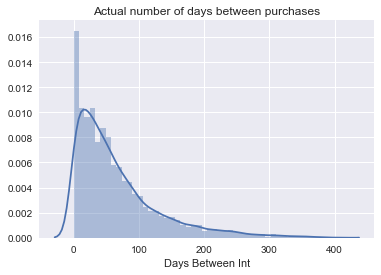

In [191]:
to_plot = customer_emails[['Email', 'Days Between Int']]
plt.title("Actual number of days between purchases")
sb.distplot(to_plot['Days Between Int'].dropna())
plt.savefig('Actual number of days between purchases')

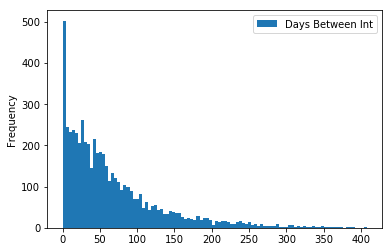

In [165]:
to_plot.plot.hist(by='Days Between Int', bins=100);
plt.title("Actual number of days between purchases")
plt.savefig('Days Between Purchases Chart.png')

In [164]:
customer_emails.to_excel("Customer Re-Purchase Time Gap.xlsx")

# Average Number of Days of Purchase

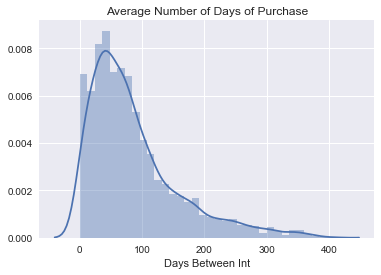

In [190]:
average_buy_days = customer_emails.pivot_table(index='Email', values='Days Between Int', aggfunc='mean').dropna().reset_index()
average_buy_days.sort_values('Days Between Int', inplace=True)
sb.distplot(a=average_buy_days['Days Between Int'])
plt.title("Average Number of Days of Purchase")
plt.savefig('Average Number of Days of Purchase.png')